In [214]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

(661794,)
Wav length: 30.013333333333332, Mel_S shape:(40, 3009)


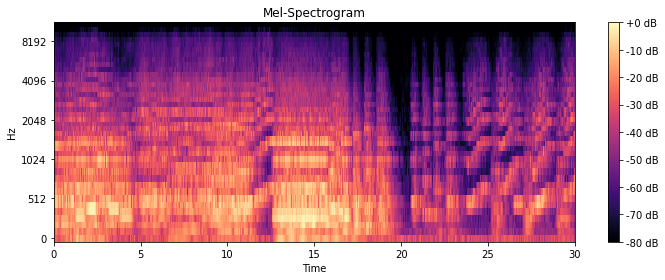

In [215]:
frame_length = 0.025
frame_stride = 0.010


y, sr = librosa.load('./genres/classical/classical.00012.wav', sr=22050)
print(y.shape)
# wav_length = len(y)/sr
input_nfft = int(round(sr*frame_length))
input_stride = int(round(sr*frame_stride))

S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()



In [216]:
# 해당 음악의 bpm(beat per minute) 출력
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
tempo,beats

(95.703125,
 array([ 214,  240,  268,  296,  323,  348,  373,  400,  427,  454,  482,
         509,  534,  558,  586,  611,  636,  664,  691,  717,  744,  772,
         802,  830,  858,  887,  917,  943,  974, 1002, 1030, 1058, 1086,
        1114, 1141, 1168]))

In [217]:
display(librosa.onset.onset_detect(y=y, sr=sr, units='time'))

array([ 0.06965986,  0.16253968,  0.58049887,  0.74303855,  0.99845805,
        1.18421769,  1.30031746,  1.4860771 ,  1.85759637,  1.9969161 ,
        2.20589569,  2.32199546,  2.62385488,  2.83283447,  3.20435374,
        3.27401361,  3.39011338,  3.52943311,  3.9938322 ,  4.17959184,
        4.29569161,  4.73687075,  4.96907029,  5.38702948,  5.57278912,
        5.80498866,  5.89786848,  5.96752834,  6.19972789,  6.40870748,
        6.52480726,  6.78022676,  7.10530612,  7.19818594,  7.36072562,
        7.50004535,  7.77868481,  7.84834467,  8.12698413,  8.42884354,
        8.54494331,  8.59138322,  8.91646259,  9.14866213,  9.45052154,
        9.56662132,  9.89170068, 10.10068027, 10.51863946, 10.63473923,
       10.70439909, 11.02947846, 11.261678  , 11.58675737, 11.86539683,
       12.09759637, 12.2369161 , 12.37623583, 12.42267574, 12.58521542,
       12.63165533, 13.2585941 , 13.65333333, 13.76943311, 13.95519274,
       14.18739229, 15.09297052, 15.23229025, 15.74312925, 15.85

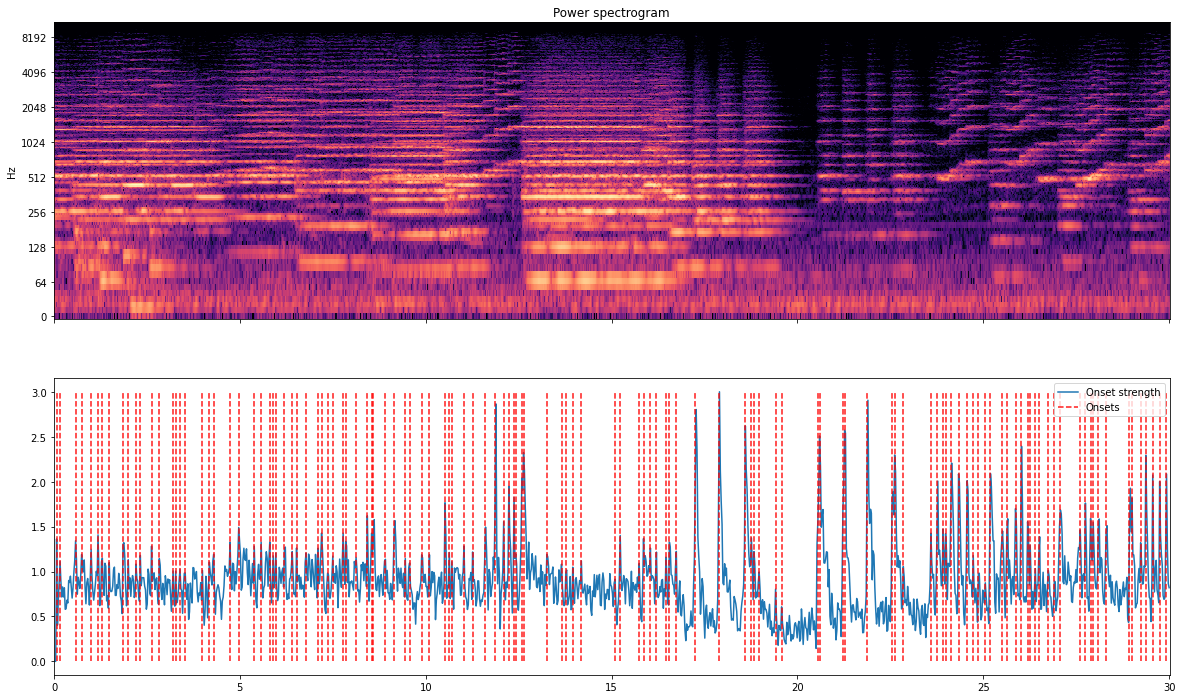

In [218]:
import matplotlib.pyplot as plt
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(figsize = (20,12),nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
           linestyle='--', label='Onsets')
ax[1].legend()

In [219]:
# 음원의 음계를 탐색
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
chroma_stft

chroma = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

for i in range(len(chroma_stft)):
    print(chroma[i], '=',np.mean(chroma_stft[i]))

C = 0.5427434
C# = 0.18962394
D = 0.19260958
D# = 0.10465749
E = 0.251092
F = 0.39665893
F# = 0.13838571
G = 0.20750612
G# = 0.121926695
A = 0.2589015
A# = 0.19369987
B = 0.22985601


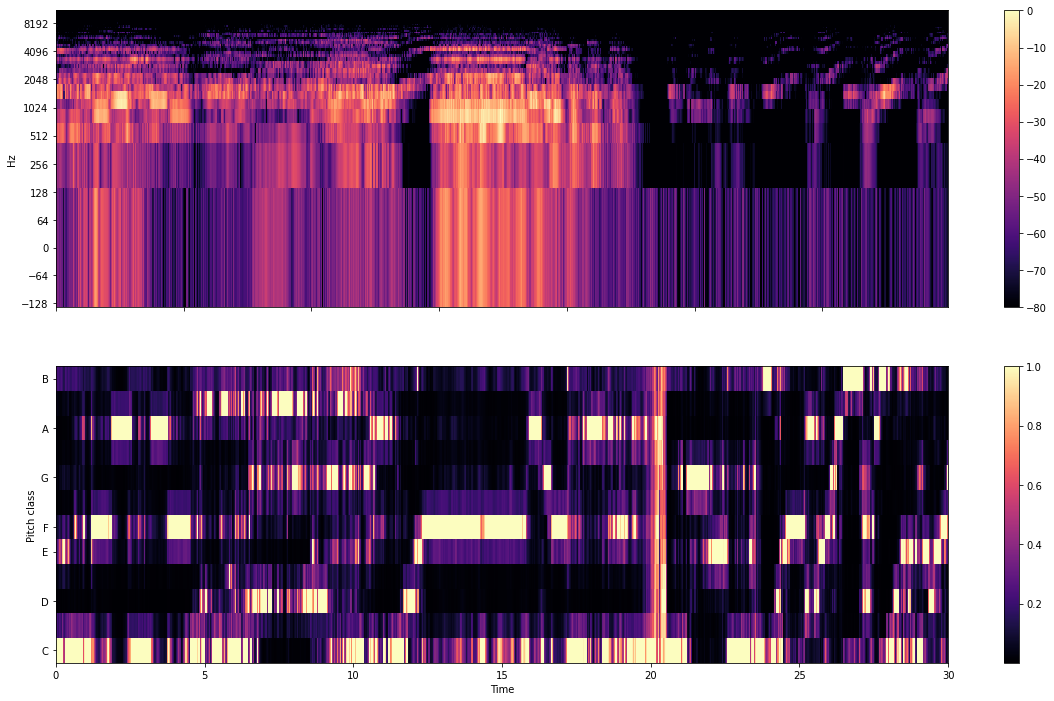

In [220]:
fig, ax = plt.subplots(figsize = (20,12),nrows=2)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

In [221]:
# Create templates for major, minor, and no-chord qualities
maj_template = np.array([1,0,0, 0,1,0, 0,1,0, 0,0,0])
min_template = np.array([1,0,0, 1,0,0, 0,1,0, 0,0,0])
N_template   = np.array([1,1,1, 1,1,1, 1,1,1, 1,1,1.]) / 4.
# Generate the weighting matrix that maps chroma to labels
weights = np.zeros((25, 12), dtype=float)
labels = ['C:maj', 'C#:maj', 'D:maj', 'D#:maj', 'E:maj', 'F:maj',
          'F#:maj', 'G:maj', 'G#:maj', 'A:maj', 'A#:maj', 'B:maj',
          'C:min', 'C#:min', 'D:min', 'D#:min', 'E:min', 'F:min',
          'F#:min', 'G:min', 'G#:min', 'A:min', 'A#:min', 'B:min',
          'N']
for c in range(12):
    weights[c, :] = np.roll(maj_template, c) # c:maj
    weights[c + 12, :] = np.roll(min_template, c)  # c:min
weights[-1] = N_template  # the last row is the no-chord class
# Make a self-loop transition matrix over 25 states
trans = librosa.sequence.transition_loop(25, 0.9)

In [222]:
y = librosa.effects.harmonic(y, margin=4)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
# Map chroma (observations) to class (state) likelihoods
probs = np.exp(weights.dot(chroma))  # P[class | chroma] ~= exp(template' chroma)
probs /= probs.sum(axis=0, keepdims=True)  # probabilities must sum to 1 in each column
# Compute independent frame-wise estimates
chords_ind = np.argmax(probs, axis=0)
# And viterbi estimates
chords_vit = librosa.sequence.viterbi_discriminative(probs, trans)

In [223]:
chords_vit

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

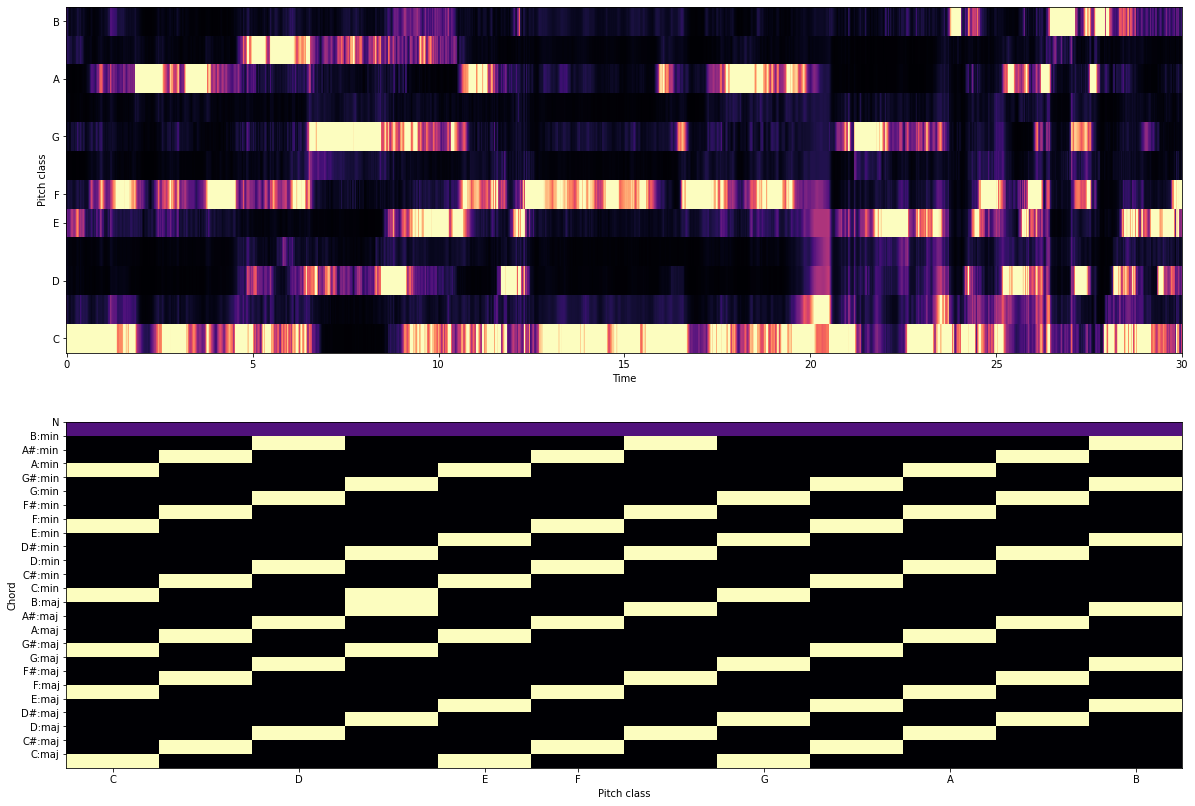

In [224]:
fig, ax = plt.subplots(figsize = (20,14),nrows=2)
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', ax=ax[0])
librosa.display.specshow(weights, x_axis='chroma', ax=ax[1])
ax[1].set(yticks=np.arange(25) + 0.5, yticklabels=labels, ylabel='Chord')
plt.show()

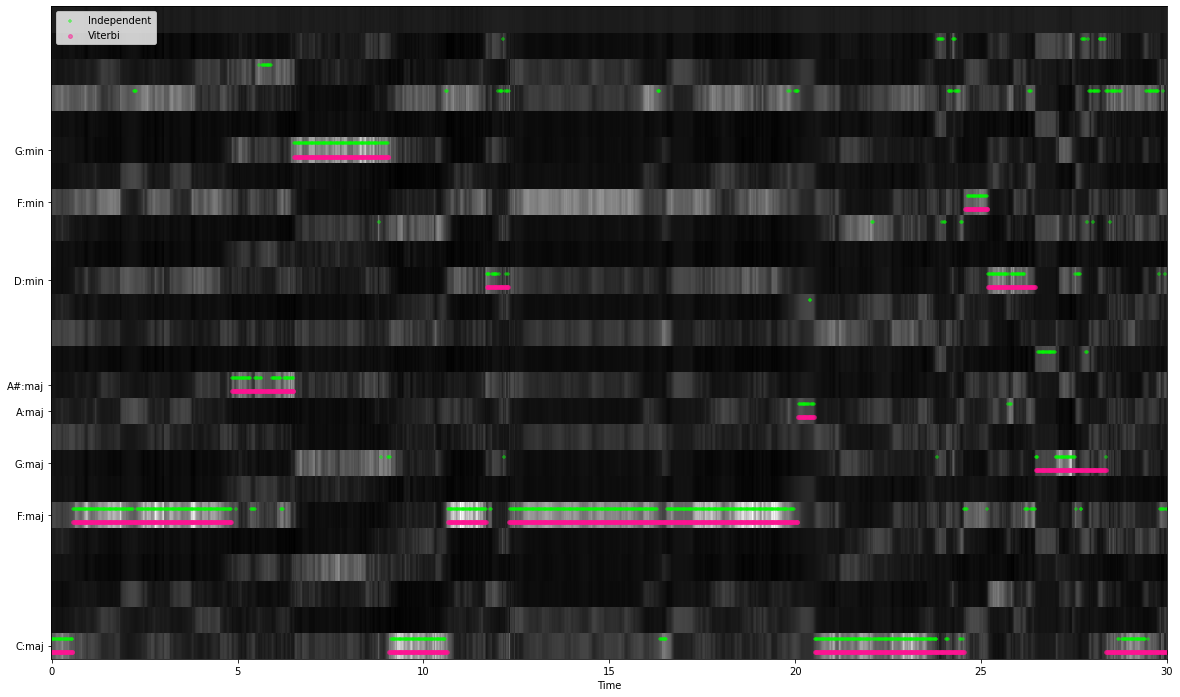

In [225]:
fig, ax = plt.subplots(figsize = (20,12))
librosa.display.specshow(probs, x_axis='time', cmap='gray', ax=ax)
times = librosa.times_like(chords_vit)
ax.scatter(times, chords_ind + 0.25, color='lime', alpha=0.5, marker='+',
           s=15, label='Independent')
ax.scatter(times, chords_vit - 0.25, color='deeppink', alpha=0.5, marker='o',
           s=15, label='Viterbi')
ax.set(yticks=np.unique(chords_vit),
       yticklabels=[labels[i] for i in np.unique(chords_vit)])
ax.legend()
plt.show()